In [141]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import accuracy_score, balanced_accuracy_score 
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, f1_score

from facecls import fcaux

In [4]:
model_root = Path("results/models/GenderClassifier/")

### ROC Curves

In [11]:
roc_baseline = pd.read_csv(model_root / "logreg_gender_001/fpr_vs_tpr__logreg_gender_001.csv",
                           usecols=["FPR", "TPR"])
roc_001 = pd.read_csv(model_root / "mynet_gender_001/fpr_vs_tpr__alexnet_gender_001.csv",
                      usecols=["FPR", "TPR"])
roc_002 = pd.read_csv(model_root / "mynet_gender_002/fpr_vs_tpr__alexnet_gender_002.csv",
                      usecols=["FPR", "TPR"])
roc_003 = pd.read_csv(model_root / "mynet_gender_003/fpr_vs_tpr__alexnet_gender_003.csv",
                      usecols=["FPR", "TPR"])

In [25]:
metrics_baseline = pd.read_csv(model_root / "logreg_gender_001/metrics__logreg_gender_001.csv",
                           usecols=["Unnamed: 0","test"])\
                     .rename({"Unnamed: 0": "metric"}, axis=1)\
                     .set_index("metric")
metrics_001 = pd.read_csv(model_root / "mynet_gender_001/metrics__alexnet_gender_001.csv",
                      usecols=["Unnamed: 0", "test"])\
                     .rename({"Unnamed: 0": "metric"}, axis=1)\
                     .set_index("metric")
metrics_002 = pd.read_csv(model_root / "mynet_gender_002/metrics__alexnet_gender_002.csv",
                      usecols=["Unnamed: 0","test"])\
                     .rename({"Unnamed: 0": "metric"}, axis=1)\
                     .set_index("metric")
metrics_003 = pd.read_csv(model_root / "mynet_gender_003/metrics__alexnet_gender_003.csv",
                      usecols=["Unnamed: 0","test"])\
                     .rename({"Unnamed: 0": "metric"}, axis=1)\
                     .set_index("metric")

In [32]:
np.round(metrics_baseline.loc["roc_auc", "test"],4)

0.9262

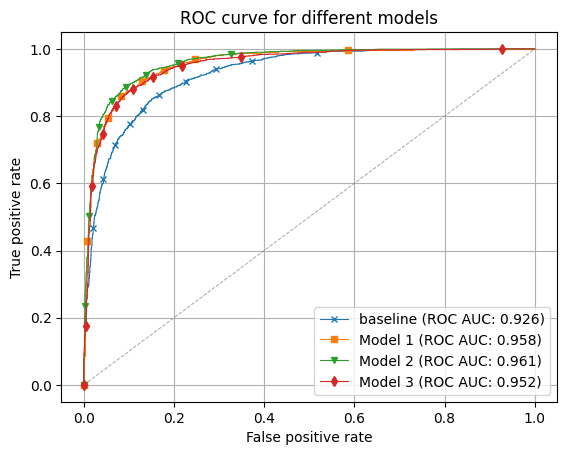

In [52]:
label_bl = f"baseline (ROC AUC: {np.round(metrics_baseline.loc['roc_auc', 'test'],3)})"
label_m1 = f"Model 1 (ROC AUC: {np.round(metrics_001.loc['roc_auc', 'test'],3)})"
label_m2 = f"Model 2 (ROC AUC: {np.round(metrics_002.loc['roc_auc', 'test'],3)})"
label_m3 = f"Model 3 (ROC AUC: {np.round(metrics_003.loc['roc_auc', 'test'],3)})"

fig, ax = plt.subplots()
ax.plot([0,1], [0,1], ls="--", c="gray", lw=0.7, alpha=0.7)
ax.plot(roc_baseline["FPR"], roc_baseline["TPR"], lw=0.8, marker="x", markersize=5, markevery=100,  label=label_bl)
ax.plot(roc_001["FPR"], roc_001["TPR"], lw=0.8,marker="s", markersize=5, markevery=100, label=label_m1)
ax.plot(roc_002["FPR"], roc_002["TPR"], lw=0.8,marker="v", markersize=5, markevery=100, label=label_m2)
ax.plot(roc_003["FPR"], roc_003["TPR"], lw=0.8,marker="d", markersize=5, markevery=100, label=label_m3)
ax.legend(loc="best")
ax.grid(True)

ax.set_xlabel("False positive rate")
ax.set_ylabel("True positive rate")

ax.set_title("ROC curve for different models")
plt.savefig("Imgs/roc_curve_comparison.png")
plt.show()

### Loss Curves

In [56]:
loss_002 = pd.read_csv(model_root / "mynet_gender_002/history__alexnet_gender_002__nepochs10.csv",)

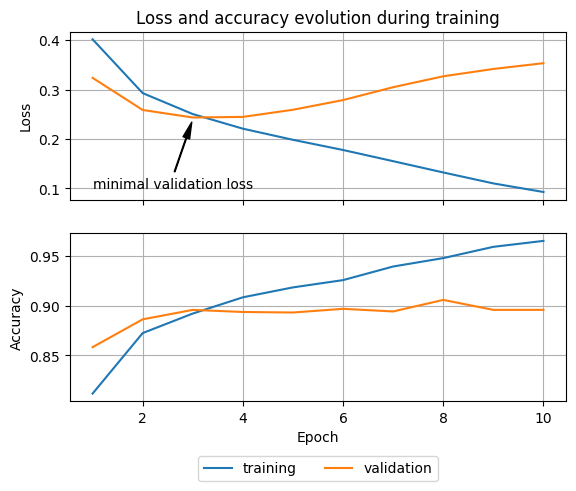

In [86]:
fig, axs = plt.subplots(2,1, sharex=True)
ax = axs[0]
ax.plot(loss_002["epoch"], loss_002["loss"])
ax.plot(loss_002["epoch"], loss_002["val_loss"])
ax.annotate("minimal validation loss",
            xy=(3, 0.24), 
            xytext=(1, 0.1), 
            arrowprops=dict(facecolor='black', width=0.5, headwidth=5, shrink=0.05))
ax.set_ylabel("Loss")
ax.set_title("Loss and accuracy evolution during training")
ax.grid("True")


ax = axs[1]
ax.plot(loss_002["epoch"], loss_002["accuracy"], label="training")
ax.plot(loss_002["epoch"], loss_002["val_accuracy"], label="validation")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend(loc="center", bbox_to_anchor=(0.5, -0.4), ncols=2)
ax.grid("True")
plt.savefig('loss_curve_model2.png', bbox_inches='tight')
plt.show()

### Comparison of different models

In [94]:
test_metrics = pd.concat([metrics_baseline.rename({"test": "baseline"}, axis=1),
metrics_001.rename({"test": "Model 1"}, axis=1),
metrics_002.rename({"test": "Model 2"}, axis=1),
metrics_003.rename({"test": "Model 3"}, axis=1)
], axis=1)

test_metrics

,baseline,Model 1,Model 2,Model 3
metric,,,,
accuracy,0.849610,0.885889,0.897279,0.886522
balanced_accuracy,0.849309,0.883957,0.896694,0.885540
roc_auc,0.926166,0.957968,0.961316,0.952493
F1,0.842501,0.875604,0.891464,0.879047


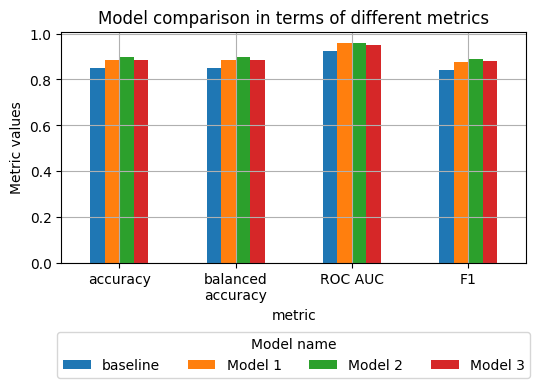

In [116]:
fig, ax = plt.subplots(figsize=(6,3))
test_metrics.plot(kind="bar", ax=ax)
ax.set_xticks([0,1,2,3], ["accuracy", "balanced\naccuracy", "ROC AUC", "F1"], rotation=0)
ax.grid(True)
ax.set_ylabel("Metric values")
ax.set_title("Model comparison in terms of different metrics")
ax.legend(loc="center", bbox_to_anchor=(0.5, -0.4), ncols=4, title="Model name")
plt.savefig("Imgs/model_comparison.png", bbox_inches='tight')
plt.show()

### Performance by population subgroup

In [119]:
model2 = keras.models.load_model(model_root / "mynet_gender_002/mynet_gender_002__refit_nepochs2.keras")

In [131]:
data = pd.read_csv("data/age_gender_preproc.csv")
full_img_vec_list = np.array([fcaux.pxlstring2pxlvec(data, i) for i in range(data.shape[0])])
full_img_array_list = np.array([fcaux.pxlvec2pxlarray(img_vec) for img_vec in full_img_vec_list])

In [210]:
indices = pd.read_csv(model_root / 
                      "mynet_gender_002/data_set_indices__mynet_gender_002.csv",
                      usecols=["train_idx","test_idx"])
idx_train = [int(idx) for idx in indices["train_idx"].values if idx==idx]
idx_test = [int(idx) for idx in indices["test_idx"].values if idx==idx]

In [135]:
X_test = full_img_array_list[idx_test]
y_test = data["gender"].values[idx_test]
X_test = X_test.reshape(X_test.shape + (1,))
X_test = X_test.astype("float32")
X_test /= 255

In [211]:
train_data = data.iloc[[i for i in idx_train if i==i]].reset_index(drop=True)
test_data = data.iloc[[i for i in idx_test if i==i]].reset_index(drop=True)

In [194]:
performance_df = dict()
for attr in ["ethnicity", "age_decades"]:
    print(attr)
    print("="*len(attr))
    subgroups = dict()
    performance_by_subgroup = dict()
    for gidx in test_data[attr].unique():
        subgroups[gidx] = list(test_data[test_data[attr]==gidx].index)
        y_prob_subg = model2.predict(X_test[subgroups[gidx]])
        y_pred_subg = np.array([np.argmax(i) for i in y_prob_subg])
        acc = accuracy_score(y_test[subgroups[gidx]], y_pred_subg)
        balacc = balanced_accuracy_score(y_test[subgroups[gidx]], y_pred_subg)
        F1 = f1_score(y_test[subgroups[gidx]], y_pred_subg)
        try:
            rocauc = roc_auc_score(y_test[subgroups[gidx]], y_prob_subg[:,1])
        except ValueError:
            rocauc = np.nan
    
        performance_by_subgroup[gidx] = {"accuracy": acc,
                                         "balanced_accuracy": balacc,
                                         "ROC_AUC": rocauc,
                                         "F1": F1}
    
    # Convert to data frame for easier plotting
    sorted_columns = sorted([k for k,v in performance_by_subgroup.items()])
    performance_df[attr] = pd.DataFrame(performance_by_subgroup, 
                                     columns = sorted_columns).transpose()    

ethnicity
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
age_decades
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/Users/mischaknabenhans/Desktop/LEARNING/Lectures/OnlineLectures/Coursera/DL_and_RL/FaceClassifier/face_cls_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


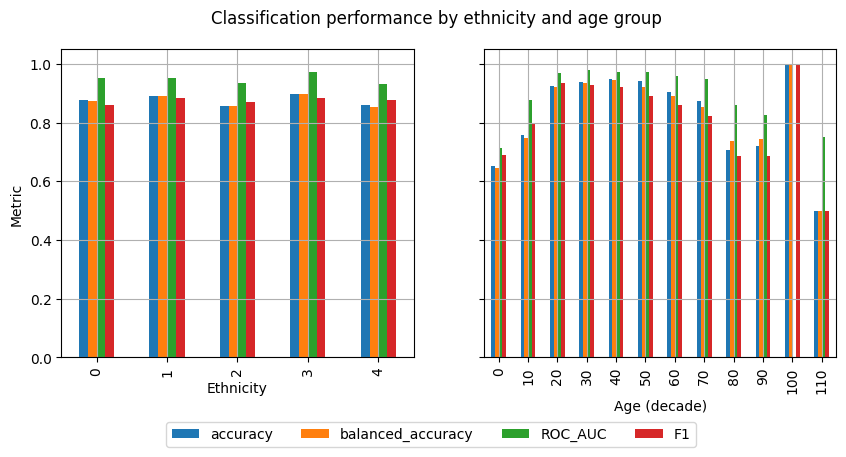

In [195]:
fig, axs = plt.subplots(1,2, figsize=(10,4), sharey=True, gridspec_kw = {"hspace": 0.07})
ax = axs[0]
performance_df["ethnicity"].plot(kind="bar", ax = ax, grid=True, legend=False)
ax.set_xlabel("Ethnicity")
ax.set_ylabel("Metric")

ax = axs[1]
performance_df["age_decades"].plot(kind="bar", ax = ax, grid=True)
ax.set_xlabel("Age (decade)")
ax.legend(loc="center", bbox_to_anchor=(-0.15,-0.25), ncol=4)

fig.suptitle("Classification performance by ethnicity and age group")

plt.savefig(model_root / 
            "mynet_gender_002/cls_performance_analysis__mynet_gender_002.png", 
            bbox_inches='tight')
plt.show()

In [177]:
performance_df["ethnicity"].apply(lambda col: (np.mean(col), np.std(col)), axis=0)

,accuracy,balanced_accuracy,ROC_AUC,F1
0,0.875624,0.874573,0.948842,0.875760
1,0.016389,0.017295,0.014302,0.008655


In [181]:
for col in performance_df["ethnicity"]:
    print(col)
    print("="*len(col))
    print("mean:", performance_df["ethnicity"][col].mean())
    print("std:", performance_df["ethnicity"][col].std())
    print()

accuracy
mean: 0.8756238419251237
std: 0.018323092630396224

balanced_accuracy
mean: 0.8745725814777947
std: 0.019336572136247697

ROC_AUC
mean: 0.9488423437576973
std: 0.015990133718652464

F1
==
mean: 0.8757600930818953
std: 0.009676864725995608



In [193]:
for attr in ["ethnicity", "age_decades"]:
    print(attr)
    for col in performance_df[attr]:
        print(col)
        print("="*len(col))
        print("mean:", performance_df[attr][col].mean())
        print("std:", performance_df[attr][col].std())
        print("spread:", performance_df[attr][col].max() - performance_df[attr][col].min())
        print()
    print()

ethnicity
accuracy
mean: 0.8756238419251237
std: 0.018323092630396224
spread: 0.04164405860010856

balanced_accuracy
mean: 0.8745725814777947
std: 0.019336572136247697
spread: 0.043233349850996916

ROC_AUC
mean: 0.9488423437576973
std: 0.015990133718652464
spread: 0.03961449751890922

F1
==
mean: 0.8757600930818953
std: 0.009676864725995608
spread: 0.023707099890096228


age_decades
accuracy
mean: 0.8225746251885231
std: 0.15254962755899573
spread: 0.5

balanced_accuracy
mean: 0.820589829376869
std: 0.14738275034306356
spread: 0.5

ROC_AUC
mean: 0.8937051487456835
std: 0.09615802382686668
spread: 0.26822399017882326

F1
==
mean: 0.810278683344455
std: 0.1441119971541523
spread: 0.5




In [206]:
len(subgroups[80]+subgroups[90]+subgroups[100]+subgroups[110])/len(subgroups[0])

0.2443280977312391

In [221]:
perf_filtered = performance_df["age_decades"].iloc[2:8,:]
perf_filtered

,accuracy,balanced_accuracy,ROC_AUC,F1
20,0.924490,0.922553,0.969101,0.936390
30,0.937835,0.936301,0.981339,0.930120
40,0.949772,0.943962,0.971680,0.921429
50,0.942982,0.923372,0.971673,0.889831
60,0.903704,0.889624,0.959820,0.860215
70,0.873239,0.854798,0.950547,0.823529


In [222]:
for col in perf_filtered:
    print(col)
    print("="*len(col))
    print("mean:", perf_filtered[col].mean())
    print("std:", perf_filtered[col].std())
    print("spread:", perf_filtered[col].max() - perf_filtered[col].min())
    print()

accuracy
mean: 0.9220036704883721
std: 0.028916505886820938
spread: 0.07653225287799859

balanced_accuracy
mean: 0.9117684766057058
std: 0.03354177703163909
spread: 0.08916390754833048

ROC_AUC
mean: 0.9673599607130092
std: 0.010725980304941856
spread: 0.030791606230045843

F1
==
mean: 0.8935856186954597
std: 0.044671650765859404
spread: 0.11286027304904778



In [226]:
data.head()

,age,age_decades,ethnicity,gender,img_name,pixels
0,1,0,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
